# A. Introduction

### Description

Dataset ini memiliki data tentang aplikasi online uber dan lyft dan terdapat informasi berupa cuaca, id pengguna, harga, waktu, jenis kendaraan dan lainnya.

### Goals

Memprediksi price menggunakan Linear Regression

# B. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# C. Read CSV

In [2]:
df = pd.read_csv('dataset/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# D. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [6]:
df.dropna(inplace=True, axis=0)
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

# E. EDA & Visualization

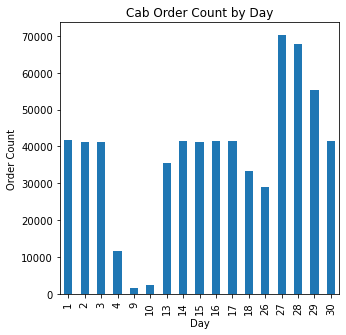

In [7]:
df_day = df.pivot_table(
    index='day',
    values='id',
    aggfunc='count'
)
df_day.rename(columns={'id':'cab order count'}, inplace=True)
df_day.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by Day')
plt.ylabel('Order Count')
plt.xlabel('Day')
plt.show()

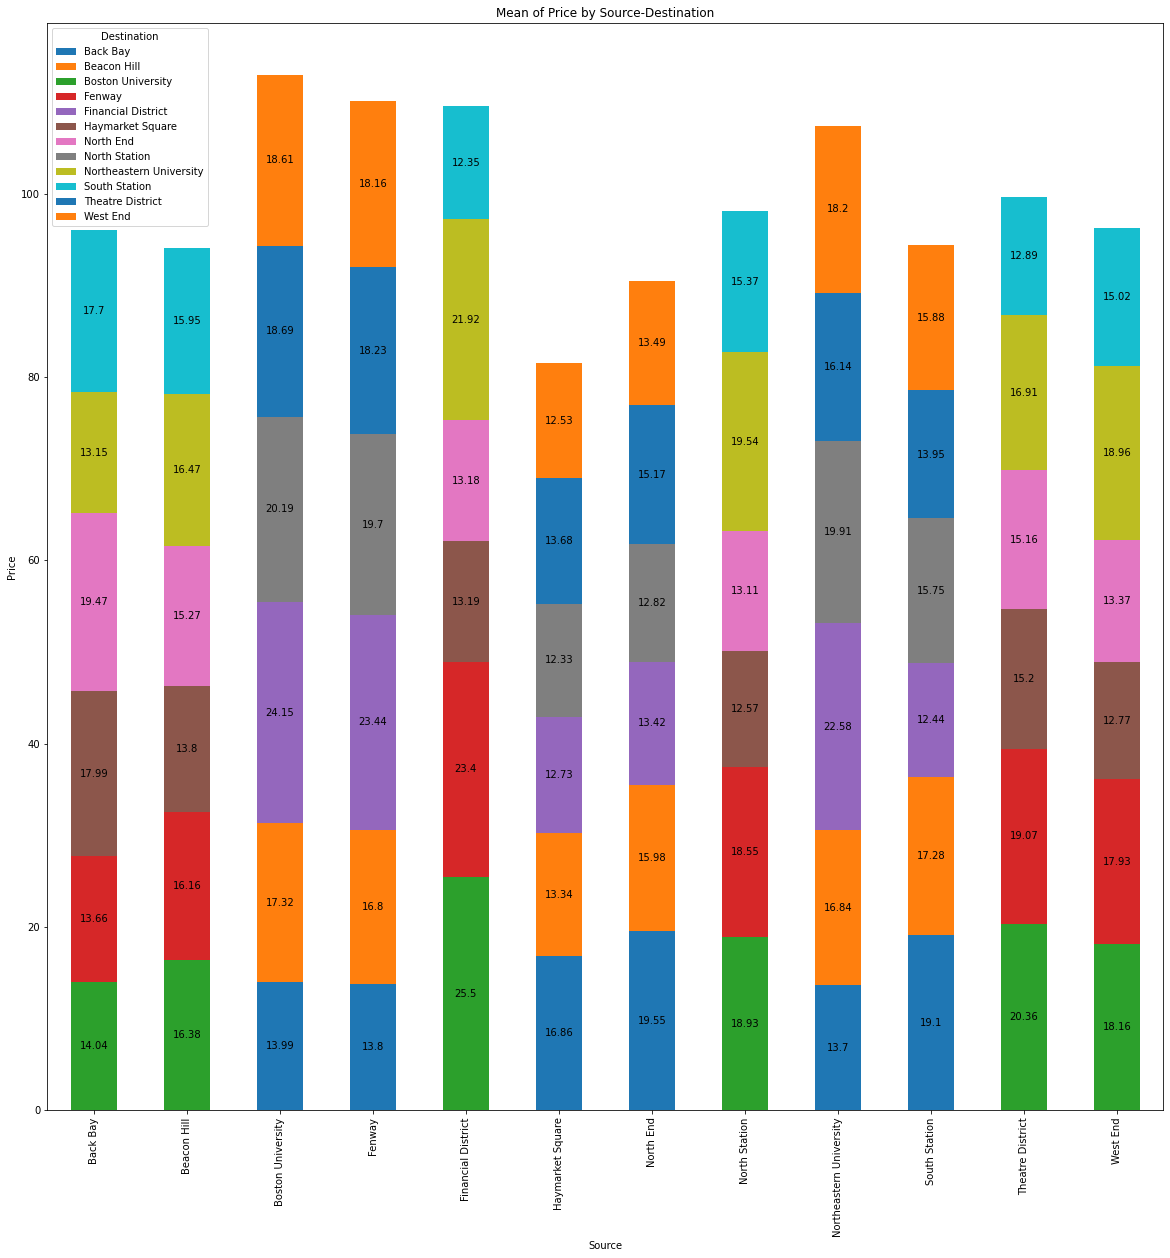

In [8]:
df_sc_dst = df.pivot_table(
    index='source',
    columns='destination',
    values='price',
    aggfunc=np.mean
)
plot = df_sc_dst.plot(kind='bar', stacked=True, figsize=(20, 20))
plt.legend(title='Destination')
plt.title('Mean of Price by Source-Destination')
plt.ylabel('Price')
plt.xlabel('Source')
for mean in plot.containers:
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
plt.show()

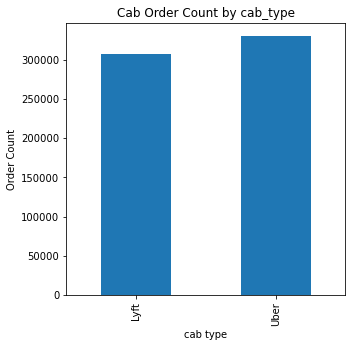

In [9]:
df_cab_type = df.pivot_table(
    index='cab_type',
    values='id',
    aggfunc='count'
)
df_cab_type.rename(columns={'id':'cab order count'}, inplace=True)
df_cab_type.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by cab_type')
plt.ylabel('Order Count')
plt.xlabel('cab type')
plt.show()

In [10]:
namecab_type = df.pivot_table(
    index='name',
    values='price',
    aggfunc='mean'
)
namecab_type

,price
name,
Black,20.523786
Black SUV,30.286763
Lux,17.771240
Lux Black,23.062468
Lux Black XL,32.324086
Lyft,9.610885
Lyft XL,15.309363
Shared,6.029893
UberPool,8.752500


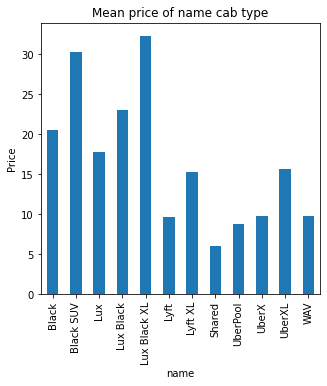

In [11]:
namecab_type.rename(columns={'id':'cab order count'}, inplace=True)
namecab_type.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Mean price of name cab type')
plt.ylabel('Price')
plt.xlabel('name')
plt.show()

In [12]:
df.rename(columns={'short_summary':'weather'}, inplace=True)
weather = df.pivot_table(
    index='weather',
    columns='cab_type',
    values='id',
    aggfunc='count'
)
weather

cab_type,Lyft,Uber
weather,,
Clear,38653,41603
Drizzle,3111,3614
Foggy,4002,4290
Light Rain,24328,26160
Mostly Cloudy,64720,69883
Overcast,97416,104013
Partly Cloudy,56663,60563
Possible Drizzle,8072,9104
Rain,10443,11338


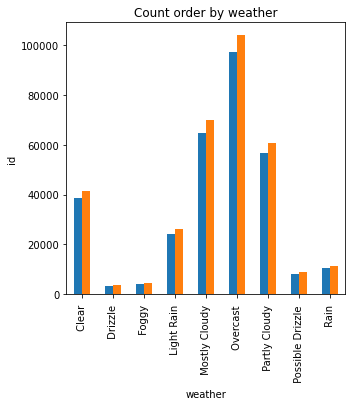

In [13]:
weather.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Count order by weather')
plt.ylabel('id')
plt.xlabel('weather')
plt.show()

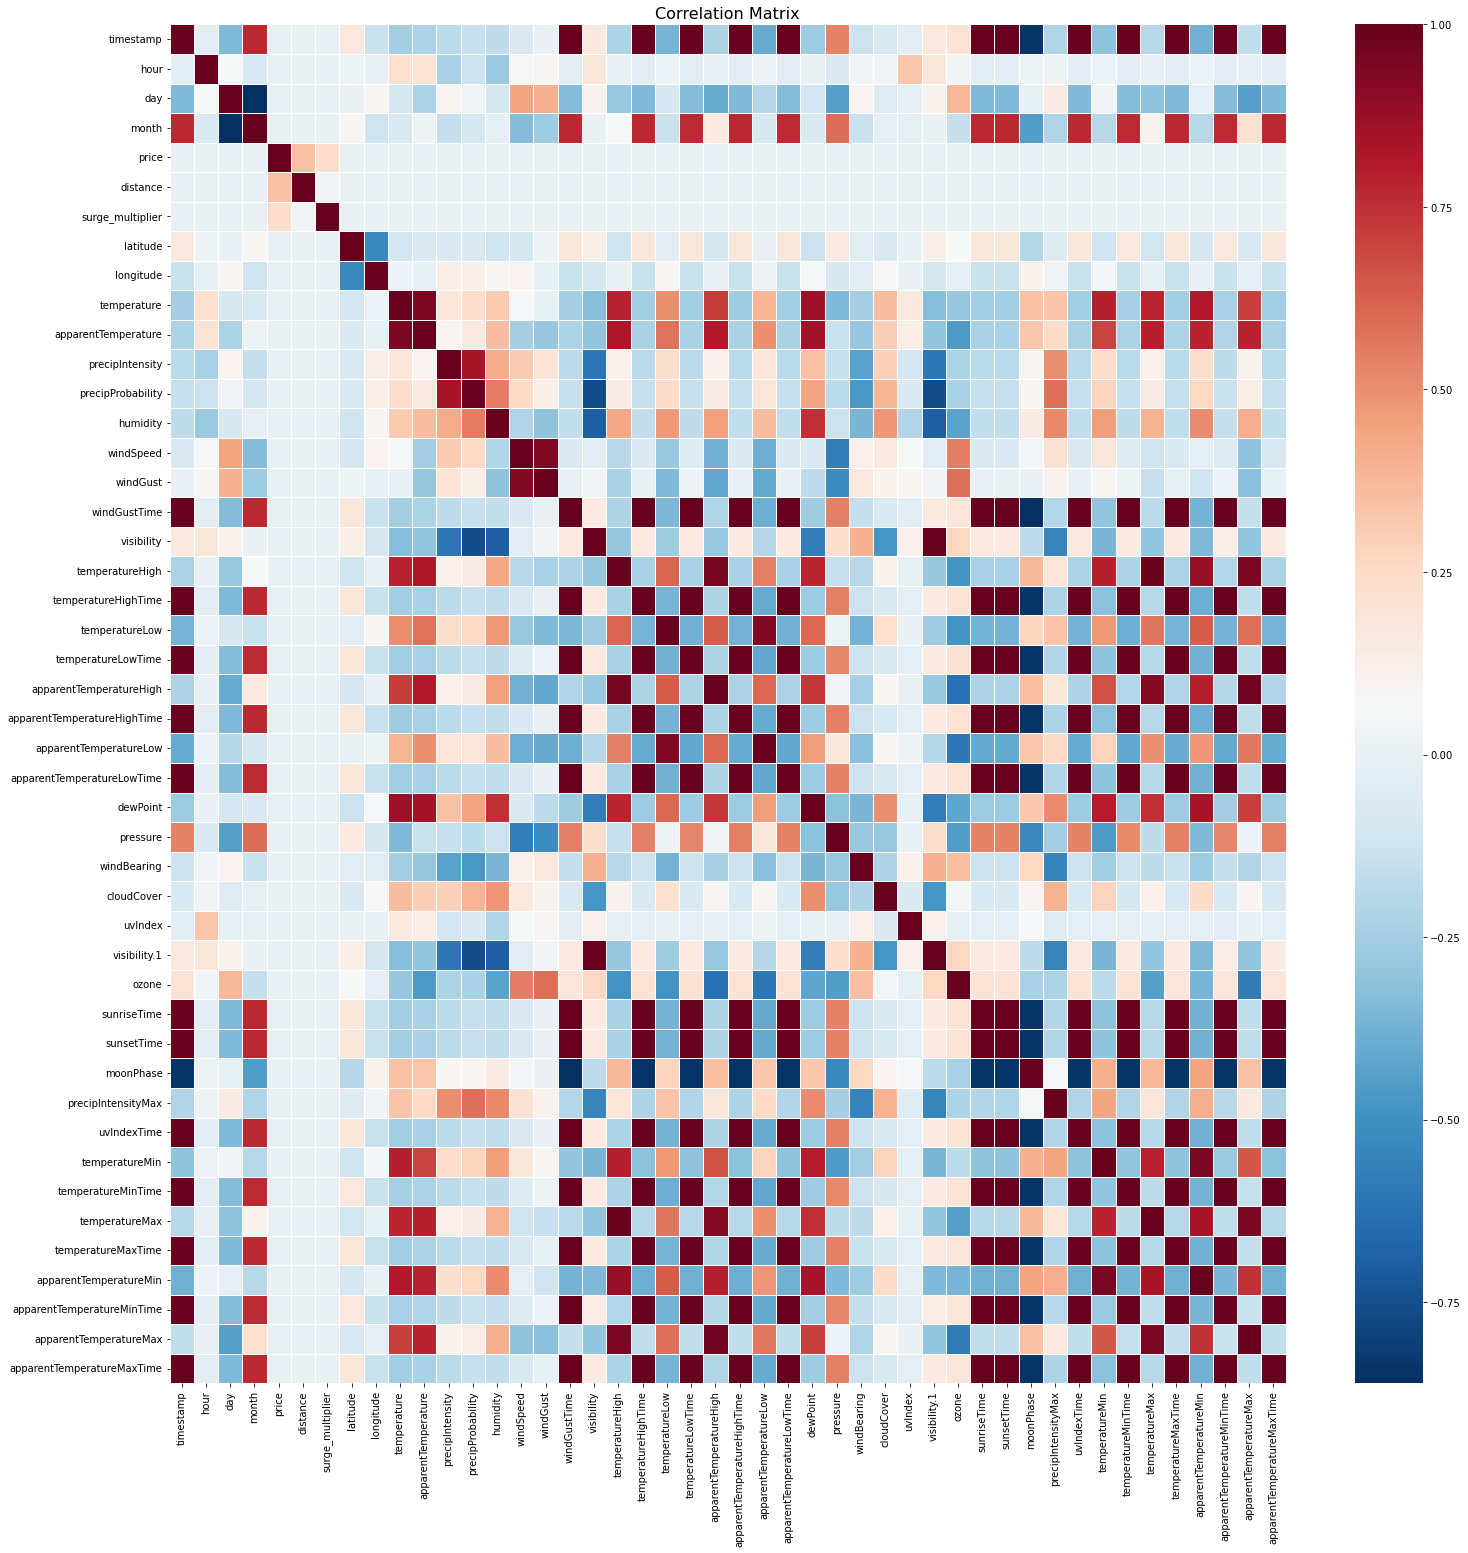

In [14]:
num_col_list = df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')].to_list()
plt.figure(figsize = (25,25))
sns.heatmap(df[num_col_list].corr(),cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

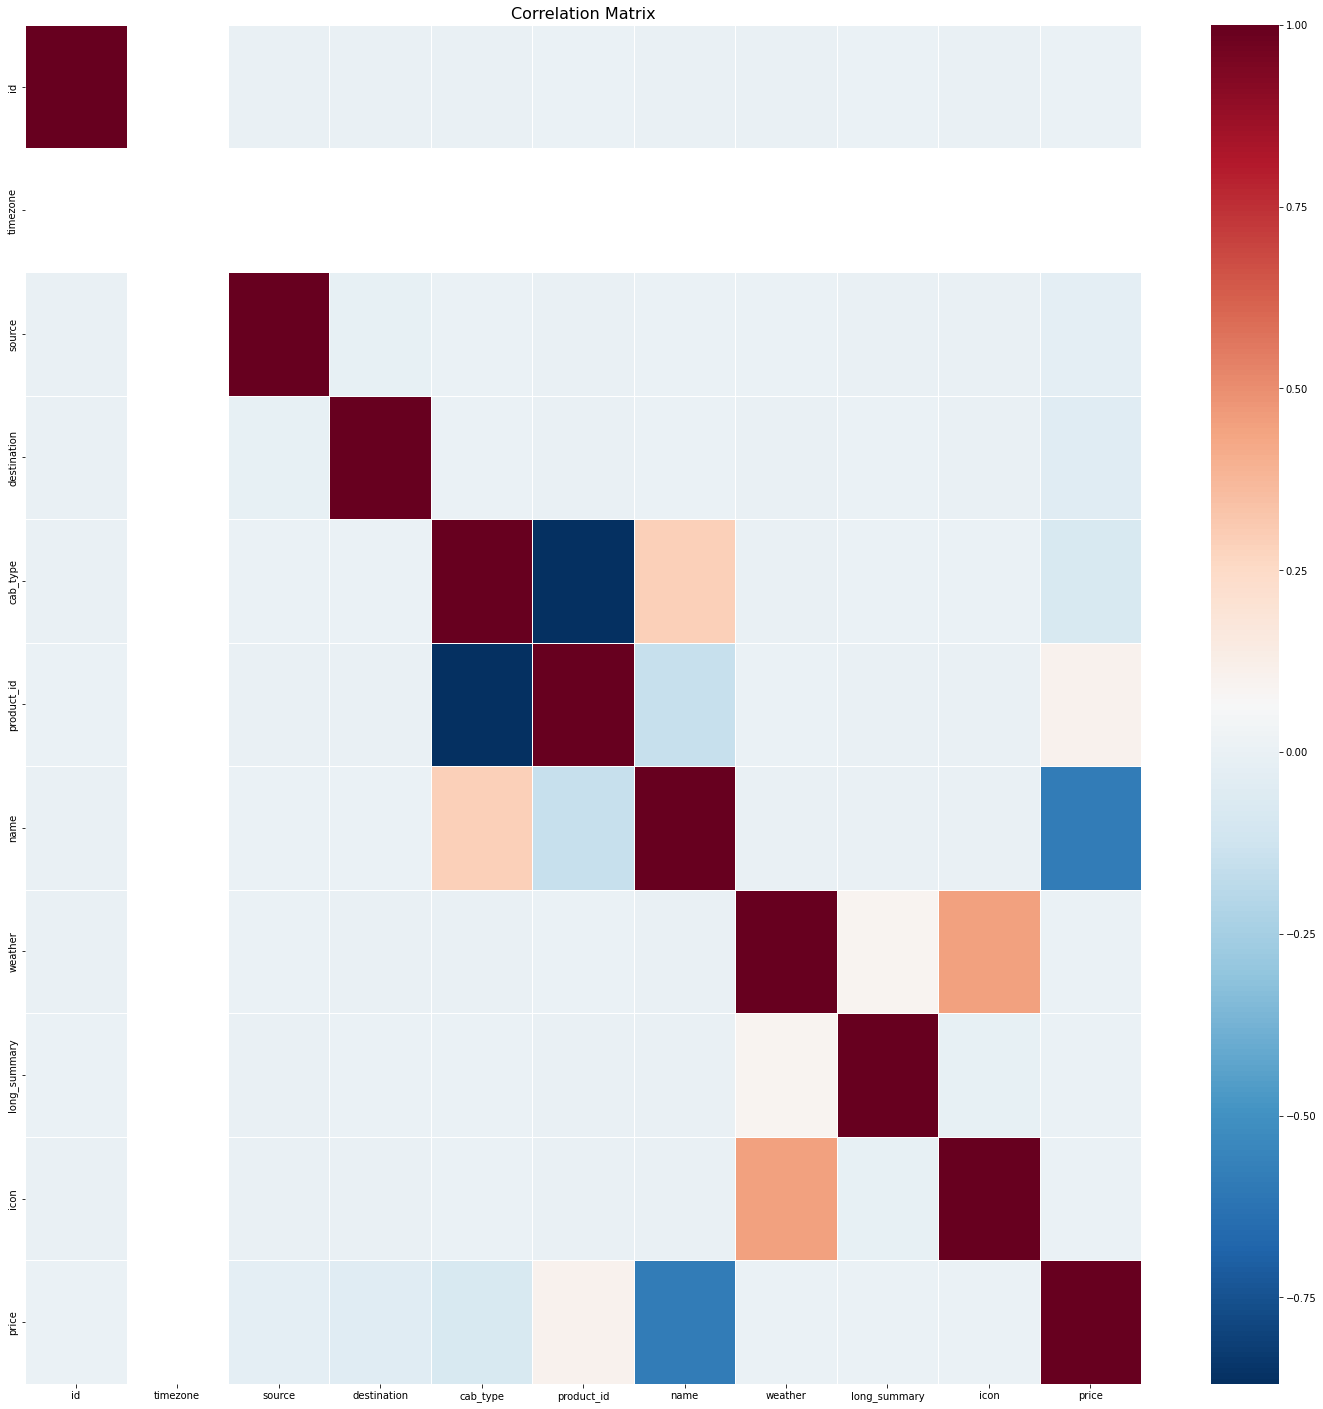

In [15]:
df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'object')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])
plt.figure(figsize = (25,25))
cat_col_list.append('price')
sns.heatmap(df_temp[cat_col_list].corr(),cmap="RdBu_r", linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [16]:
df_temp.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.102679
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
weather                        0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760


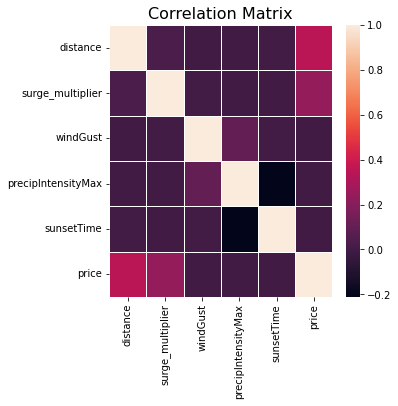

In [32]:
df_use = df[['distance', 'surge_multiplier', 'weather', 'windGust', 'precipIntensityMax', 'sunsetTime', 'price']]
# num_col_list = df['distance', 'surge_multiplier', 'weather', 'windGust', 'precipIntensityMax', 'sunsetTime'].to_list()
plt.figure(figsize = (5,5))
sns.heatmap(df_use.corr(), linewidths=.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [33]:
df_use.corr()['sunsetTime'].sort_values(ascending=False)

sunsetTime            1.000000
windGust              0.004605
distance              0.003291
price                 0.000760
surge_multiplier      0.000585
precipIntensityMax   -0.210803
Name: sunsetTime, dtype: float64

In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_col = df_use.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df_use[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df_use = df_use.drop(col, axis=1)
    df_use = pd.concat([df_use, enc_df], axis=1)

['weather']


D:\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
df_use = df_use.dropna()
df_use

,distance,surge_multiplier,windGust,precipIntensityMax,sunsetTime,price,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,0.44,1.0,9.17,0.1276,1.544995e+09,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,11.98,0.1300,1.543267e+09,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.44,1.0,7.33,0.1064,1.543353e+09,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,5.28,0.0000,1.543526e+09,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,9.14,0.0001,1.543440e+09,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,2.46,1.0,3.86,0.0001,1.544736e+09,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637972,2.46,1.0,3.86,0.0001,1.544736e+09,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637973,2.67,1.0,3.86,0.0001,1.544736e+09,16.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637974,2.67,1.0,3.86,0.0001,1.544736e+09,22.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# G. Model Definition

In [40]:
x = df_use.drop(columns='price')
y = df_use['price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# H. Model Training

In [43]:
pred_test = model.predict(x_test)

In [44]:
test = x_test.copy()
df_test = pd.DataFrame(test)

In [45]:
df_test['predicted_price'] = pred_test

In [46]:
df_test.head(10)

,distance,surge_multiplier,windGust,precipIntensityMax,sunsetTime,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain,predicted_price
447609,1.03,1.0,3.03,0.0000,1.543699e+09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.980221
216174,0.49,1.0,4.22,0.0001,1.544736e+09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.415883
603122,2.17,1.0,9.70,0.1261,1.544995e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.144979
583621,2.83,1.0,4.09,0.0000,1.543699e+09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.065103
503729,2.32,1.0,11.74,0.1430,1.543353e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.585000
629767,2.66,1.0,7.02,0.1245,1.543267e+09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.586052
496933,2.14,1.0,14.86,0.0000,1.543440e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.100116
272355,1.03,1.0,13.65,0.0005,1.543872e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.991079
279735,0.72,1.0,7.91,0.0217,1.545081e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.157309
319413,3.41,1.0,4.28,0.0000,1.544822e+09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.618536


# I. Model Evaluation

In [47]:
print("Accuracy Score: ", str(model.score(x_test, y_test)))
print("Mean Squared Error: ", str(mean_squared_error(y_test, pred_test)))

Accuracy Score:  0.17364140138200146
Mean Squared Error:  71.69527246469924


# J. Pickle

In [49]:
import pickle
pickle.dump(model, open('transport_price_model.pkl', 'wb'))

# Conclusion

Dari hasil Model Evaluation, 'distance', 'surge_multiplier', 'weather', 'windGust', 'precipIntensityMax', 'sunsetTime' memiliki pengaruh sangat kecil terhadap akurasi pada model yaitu 10%. Hal ini dapat menunjukkan bahwa memang faktor - faktor tersebut tidak memiliki keterkaitan yang besar terhadap harga